In [1]:
import statsmodels.formula.api as smf
from pathlib import Path
import pandas as pd
import json

paths = [
    Path("../../analysis/mouse_m01_d2/results/simclr_neural_pc1_m01_d2.json"),
    Path("../../analysis/mouse_m02_d3/results/simclr_neural_pc1_m02_d3.json"),
    Path("../../analysis/mouse_m03_d4/results/simclr_neural_pc1_m03_d4.json"),
    Path("../../analysis/mouse_m01_d2/results/vgg19_neural_pc1_m01_d2.json"),
    Path("../../analysis/mouse_m02_d3/results/vgg19_neural_pc1_m02_d3.json"),
    Path("../../analysis/mouse_m03_d4/results/vgg19_neural_pc1_m03_d4.json"),
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 210 rows from 6 files.


,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
0,vgg19_neural_pc1,m01_d2,conv2_2,NaN,0.407,0.431,1.396,1.423,0.152,NaN,NaN
1,vgg19_neural_pc1,m01_d2,conv2_2,10.0,0.342,0.362,1.396,1.423,0.172,-0.099,-0.118
2,vgg19_neural_pc1,m01_d2,conv2_2,20.0,0.367,0.389,1.396,1.423,0.169,-0.094,-0.118
3,vgg19_neural_pc1,m01_d2,conv2_2,50.0,0.404,0.427,1.396,1.423,0.167,-0.087,-0.119
4,vgg19_neural_pc1,m01_d2,conv2_2,100.0,0.407,0.431,1.396,1.423,0.166,-0.091,-0.120
...,...,...,...,...,...,...,...,...,...,...,...
95,simclr_neural_pc1,m02_d3,fc,200.0,0.510,0.555,1.704,1.712,0.128,0.107,NaN
96,simclr_neural_pc1,m02_d3,fc,300.0,0.512,0.557,1.704,1.712,0.129,0.105,NaN
97,simclr_neural_pc1,m02_d3,fc,400.0,0.514,0.560,1.704,1.712,0.129,0.110,NaN
98,simclr_neural_pc1,m02_d3,fc,500.0,0.512,0.558,1.704,1.712,0.129,0.084,NaN


In [2]:
# Filter to n_pcs = 100 and exclude Gabor
df_filtered = df.query("n_pcs == 100 and model_target in ['simclr_neural_pc1', 'vgg19_neural_pc1']").copy()
df_filtered.head(100)

,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,silhouette_score_stringer
4,vgg19_neural_pc1,m01_d2,conv2_2,100.0,0.407,0.431,1.396,1.423,0.166,-0.091,-0.120
9,vgg19_neural_pc1,m01_d2,conv3_4,100.0,0.407,0.430,1.515,1.462,0.202,-0.056,-0.136
14,vgg19_neural_pc1,m01_d2,conv4_4,100.0,0.394,0.417,1.616,1.645,0.169,0.000,-0.106
19,vgg19_neural_pc1,m01_d2,conv5_4,100.0,0.279,0.296,1.867,1.698,0.125,0.252,-0.118
24,simclr_neural_pc1,m01_d2,fc,100.0,0.477,0.503,1.702,1.711,0.188,0.108,-0.065
33,vgg19_neural_pc1,m01_d2,fc2,100.0,0.263,0.280,1.583,1.589,0.107,0.447,-0.112
38,simclr_neural_pc1,m01_d2,layer1,100.0,0.425,0.450,3.891,4.271,0.168,-0.114,-0.097
47,simclr_neural_pc1,m01_d2,layer2,100.0,0.485,0.513,3.487,3.872,0.151,-0.080,-0.076
56,simclr_neural_pc1,m01_d2,layer3,100.0,0.490,0.517,1.911,1.917,0.182,-0.005,-0.081
65,simclr_neural_pc1,m01_d2,layer4,100.0,0.470,0.496,1.887,1.894,0.143,0.085,-0.071


In [3]:
models = {}

for model_name in ['simclr_neural_pc1', 'vgg19_neural_pc1']:
    df_model = df_filtered[df_filtered['model_target'] == model_name].copy()

    # Drop rows with NaNs in predictors
    df_model = df_model.dropna(subset=['alpha', 'spearman_correlation', 'silhouette_score', 'mean_fev'])

    # Fit the mixed-effects model
    md = smf.mixedlm(
        formula="mean_fev ~ alpha + spearman_correlation + silhouette_score",
        data=df_model,
        groups="mouse_id"
    )
    mdf = md.fit()
    models[model_name] = mdf

    print(f"\n--- {model_name.upper()} ---")
    print(mdf.summary())


--- SIMCLR_NEURAL_PC1 ---
             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    mean_fev
No. Observations:    15         Method:                REML    
No. Groups:          3          Scale:                 0.0009  
Min. group size:     5          Log-Likelihood:        22.5030 
Max. group size:     5          Converged:             Yes     
Mean group size:     5.0                                       
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.656    0.108  6.046 0.000  0.443  0.869
alpha                -0.058    0.024 -2.448 0.014 -0.104 -0.012
spearman_correlation -0.125    0.507 -0.247 0.805 -1.119  0.869
silhouette_score     -0.430    0.242 -1.774 0.076 -0.905  0.045
mouse_id Var          0.003    0.118                           


--- VGG19_NEURAL_PC1 ---

/Users/callummessiter/workspace/msc-neuro/research-project/myenv/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/callummessiter/workspace/msc-neuro/research-project/myenv/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)



--- SIMCLR_NEURAL_PC1 (OLS) ---

Predictor correlations:
                             alpha  spearman_correlation  \
alpha                      1.00000             -0.000210   
spearman_correlation      -0.00021              1.000000   
silhouette_score_stringer -0.79978             -0.116153   

                           silhouette_score_stringer  
alpha                                      -0.799780  
spearman_correlation                       -0.116153  
silhouette_score_stringer                   1.000000  

Model fits:
rsa                  AIC =  -42.47 | Adj. R² =  0.553
rsa, alpha           AIC =  -42.19 | Adj. R² =  0.570
rsa, semanticity     AIC =  -42.81 | Adj. R² =  0.596
rsa, alpha, semanticity AIC =  -40.84 | Adj. R² =  0.530
null                 AIC =  -35.23 | Adj. R² =  0.000
alpha                AIC =  -33.88 | Adj. R² = -0.054
semanticity          AIC =  -33.62 | Adj. R² = -0.082
alpha, semanticity   AIC =  -31.88 | Adj. R² = -0.205


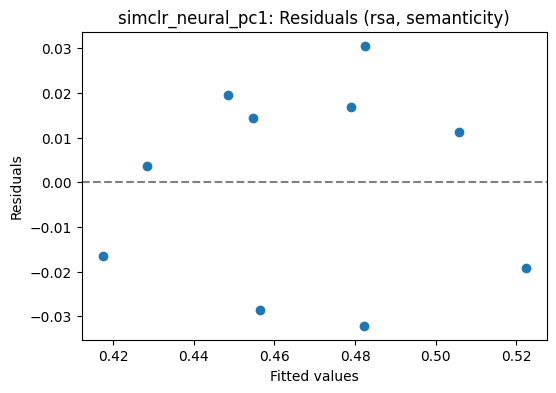

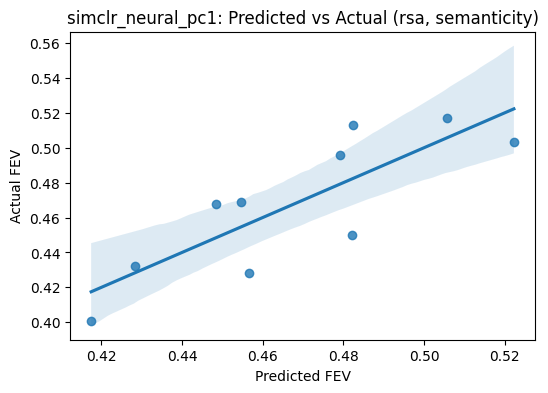


--- VGG19_NEURAL_PC1 (OLS) ---

Predictor correlations:
                             alpha  spearman_correlation  \
alpha                      1.00000             -0.239530   
spearman_correlation      -0.23953              1.000000   
silhouette_score_stringer  0.25680             -0.206032   

                           silhouette_score_stringer  
alpha                                       0.256800  
spearman_correlation                       -0.206032  
silhouette_score_stringer                   1.000000  

Model fits:
rsa                  AIC =  -44.33 | Adj. R² =  0.614
rsa, alpha           AIC =  -49.21 | Adj. R² =  0.736
rsa, semanticity     AIC =  -43.20 | Adj. R² =  0.606
rsa, alpha, semanticity AIC =  -47.48 | Adj. R² =  0.717
null                 AIC =  -30.93 | Adj. R² =  0.000
alpha                AIC =  -34.20 | Adj. R² =  0.242
semanticity          AIC =  -30.39 | Adj. R² =  0.023
alpha, semanticity   AIC =  -32.83 | Adj. R² =  0.213


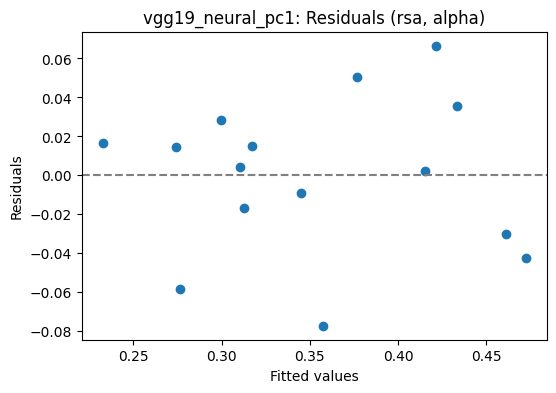

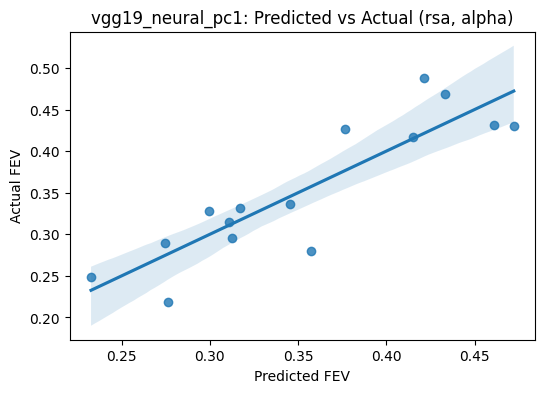

In [4]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

summary_rows = []

for model_name in ['simclr_neural_pc1', 'vgg19_neural_pc1']:
    print(f"\n--- {model_name.upper()} (OLS) ---")

    df_model = df_filtered[df_filtered['model_target'] == model_name].copy()
    df_model = df_model.dropna(subset=["alpha", "spearman_correlation", "silhouette_score_stringer", "mean_fev"])

    # check multicollinearity
    print("\nPredictor correlations:")
    print(df_model[["alpha", "spearman_correlation", "silhouette_score_stringer"]].corr())

    model_formulas = {
        "rsa": "mean_fev ~ spearman_correlation",
        "rsa, alpha": "mean_fev ~ alpha + spearman_correlation",
        "rsa, semanticity": "mean_fev ~ spearman_correlation + silhouette_score_stringer",
        "rsa, alpha, semanticity": "mean_fev ~ alpha + spearman_correlation + silhouette_score_stringer",
        "null": "mean_fev ~ 1",
        "alpha": "mean_fev ~ alpha",
        "semanticity": "mean_fev ~ silhouette_score_stringer",
        "alpha, semanticity": "mean_fev ~ alpha + silhouette_score_stringer",
    }

    results = {}

    print("\nModel fits:")
    for name, formula in model_formulas.items():
        model = smf.ols(formula, data=df_model).fit()
        results[name] = model
        print(f"{name:20s} AIC = {model.aic:7.2f} | Adj. R² = {model.rsquared_adj:6.3f}")
        
        # Store for summary table
        summary_rows.append({
            "model_type": model_name,
            "model_formula": name,
            "AIC": model.aic,
            "adj_r2": model.rsquared_adj
        })

    # Plot residuals for best model (lowest AIC)
    best_name = min(results, key=lambda k: results[k].aic)
    best_model = results[best_name]

    residuals = best_model.resid
    fitted = best_model.fittedvalues

    plt.figure(figsize=(6, 4))
    plt.scatter(fitted, residuals)
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.title(f"{model_name}: Residuals ({best_name})")
    plt.show()

    # Plot predicted vs actual
    plt.figure(figsize=(6, 4))
    sns.regplot(x=fitted, y=df_model["mean_fev"])
    plt.xlabel("Predicted FEV")
    plt.ylabel("Actual FEV")
    plt.title(f"{model_name}: Predicted vs Actual ({best_name})")
    plt.show()

In [5]:
pd.options.display.float_format = '{:.4f}'.format
summary_df = pd.DataFrame(summary_rows)
summary_df = summary_df.sort_values(by=["model_type", "AIC"])
summary_df.head(20)

,model_type,model_formula,AIC,adj_r2
2,simclr_neural_pc1,"rsa, semanticity",-42.8117,0.5961
0,simclr_neural_pc1,rsa,-42.4717,0.5535
1,simclr_neural_pc1,"rsa, alpha",-42.1899,0.5702
3,simclr_neural_pc1,"rsa, alpha, semanticity",-40.8430,0.5303
4,simclr_neural_pc1,null,-35.2317,0.0000
5,simclr_neural_pc1,alpha,-33.8796,-0.0544
6,simclr_neural_pc1,semanticity,-33.6218,-0.0819
7,simclr_neural_pc1,"alpha, semanticity",-31.8803,-0.2050
9,vgg19_neural_pc1,"rsa, alpha",-49.2067,0.7358
11,vgg19_neural_pc1,"rsa, alpha, semanticity",-47.4842,0.7171


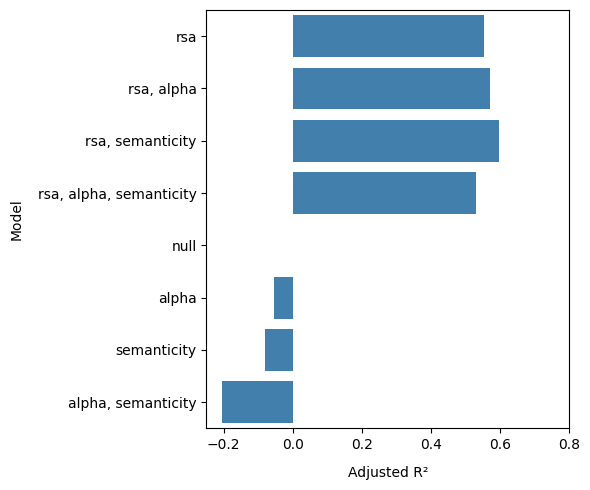

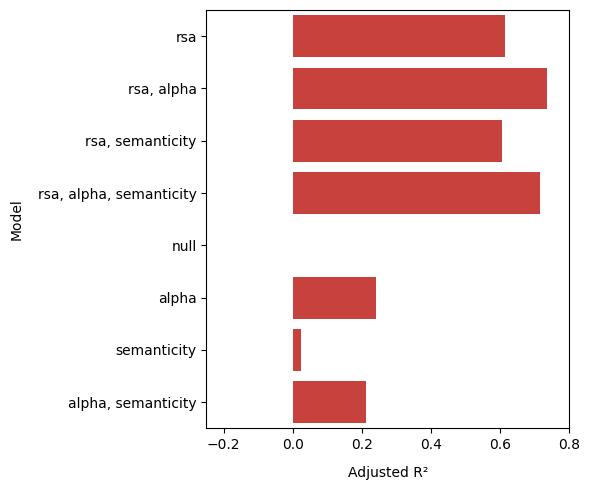

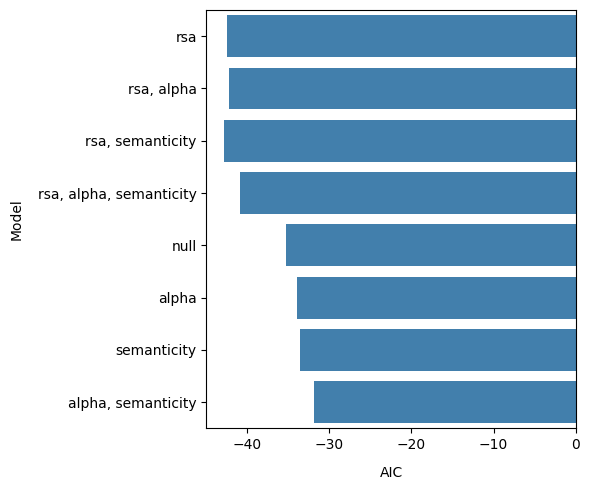

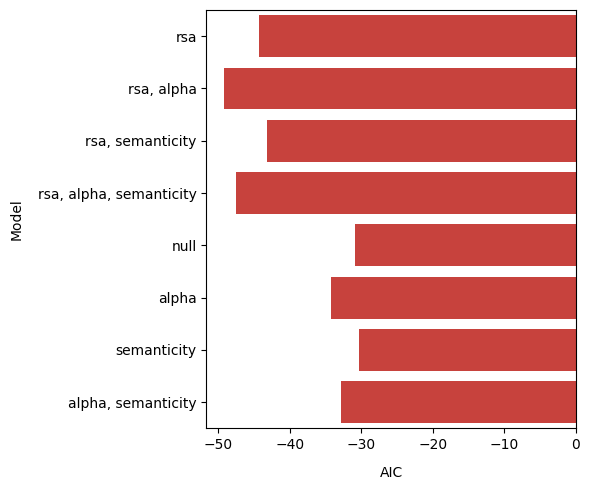

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from cortexlib.utils.plotting import simclr_colours, vgg19_colours

y_order =  [
    "rsa",
    "rsa, alpha",
    "rsa, semanticity",
    "rsa, alpha, semanticity",
    "null",
    "alpha",
    "semanticity",
    "alpha, semanticity"
]

model_colors = {
    'simclr_neural_pc1': simclr_colours['layer4'],
    'vgg19_neural_pc1': vgg19_colours['conv5_4'],
}

# Unique model types
model_types = summary_df['model_type'].unique()

for model in model_types:
    df_subset = summary_df[summary_df['model_type'] == model]

    plt.figure(figsize=(6, 5))
    sns.barplot(
        data=df_subset,
        x='adj_r2',
        y='model_formula',
        color=model_colors[model],
        order=y_order,
    )

    plt.xlabel("Adjusted R²", labelpad=10)
    plt.ylabel("Model", labelpad=10)
    plt.xlim(-0.25, 0.8)
    plt.tight_layout()
    plt.savefig(f"./bar/figures/multivariate_{model}.svg", format='svg')
    plt.show()

for model in model_types:
    df_subset = summary_df[summary_df['model_type'] == model]

    plt.figure(figsize=(6, 5))
    sns.barplot(
        data=df_subset,
        x='AIC',
        y='model_formula',
        color=model_colors[model],
        order=y_order,
    )

    plt.xlabel("AIC", labelpad=10)
    plt.ylabel("Model", labelpad=10)
    # plt.xlim(-0.25, 0.8)
    plt.tight_layout()
    plt.show()